In [1]:
import zipfile
with zipfile.ZipFile('c:/data/mnist/dataset.zip') as zip_ref:
    zip_ref.extractall('c:/data/mnist/')

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home='c:/data/mnist', as_frame=False)
mnist.data[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
import numpy as np
X, y = mnist['data'], mnist['target']
y = y.astype(np.int64)
print(X.shape, y.shape)

(70000, 784) (70000,)


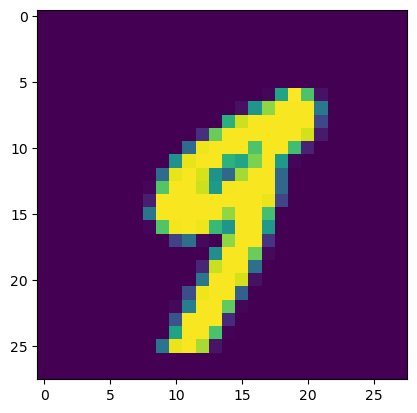

In [4]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)
plt.show()

In [5]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=matplotlib.cm.binary)
    plt.axis('off')

9

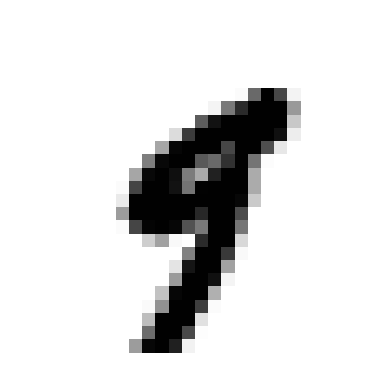

In [6]:
plot_digit(X[36000])
y[36000]

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
#이진 분류기(5의 여부)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
#확률적 경사하강법
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, random_state=0)
sgd_clf.fit(X_train, y_train_5)

c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5, random_state=0)

In [11]:
sgd_clf.predict([some_digit])

array([False])

In [12]:
#교차검증
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.96595, 0.96925, 0.96545])

In [13]:
#클래스 비율이 유지되는 교차검증
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # 분류 모형 복제
    clone_clf = clone(sgd_clf)
    # 학습용, 검증용 구분
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    # 학습
    clone_clf.fit(X_train_folds, y_train_folds)
    # 분류
    y_pred = clone_clf.predict(X_test_folds)
    # 정확도
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.96595


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.96925
0.96545


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [14]:
#모든 예측결과를 False로 리턴하는 테스트용 클래스
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    # 2원 영배열(행의수는 샘플개수), 0을 False로 리턴
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [15]:
never_5_clf = Never5Classifier()
print(never_5_clf.predict(X_train))
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


array([0.91045, 0.91025, 0.90825])

In [57]:
from sklearn.metrics import classification_report
classification_report(never_5_clf.predict(X_train), y_train_5)

c:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n       False       1.00      0.91      0.95     60000\n        True       0.00      0.00      0.00         0\n\n    accuracy                           0.91     60000\n   macro avg       0.50      0.45      0.48     60000\nweighted avg       1.00      0.91      0.95     60000\n'

In [17]:
#오차행렬
from sklearn.metrics import confusion_matrix
y_train_pred = sgd_clf.predict(X_train)
cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

[[53167  1412]
 [  934  4487]]
53167 1412 934 4487


In [18]:
#정밀도
from sklearn.metrics import precision_score
print(precision_score(y_train_5, y_train_pred))
print(tp / (tp + fp))

0.7606373961688422
0.7606373961688422


In [19]:
#민감도
from sklearn.metrics import recall_score
print(recall_score(y_train_5, y_train_pred))
print(tp / (tp + fn))

0.8277070651171371
0.8277070651171371


In [20]:
#f1-score(정밀도와 재현율의 조화 평균)
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.792756183745583

In [21]:
#sgd 모형의 판별함수
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-232032.20068509])

In [22]:
#판별함수의 값 0을 기준으로 분류하는 경우
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [23]:
#판별함수의 결과값을 조절함
threshold = -417921
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [24]:
#예측결과가 아닌 결정점수를 리턴하는 교차검증
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores)
print(y_scores.shape)

c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[ -88898.69270821  418510.29937632 -638824.46348318 ... -881764.63554437
 -423778.17790031 -563072.4529962 ]
(60000,)


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


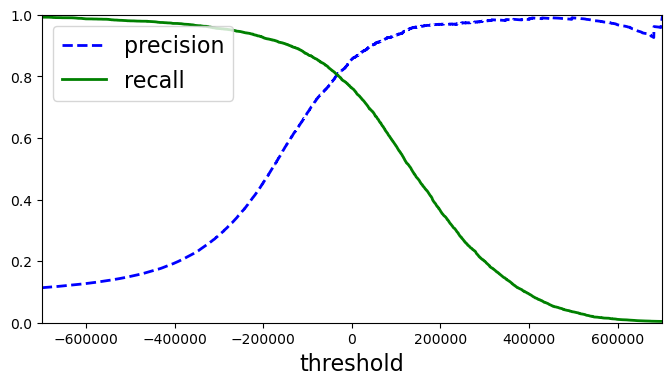

In [32]:
#판별함수의 결과값을 이용하여 모든 임계값에 대한 정밀도와 재현율 계산
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="recall", linewidth=2)
    plt.xlabel("threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

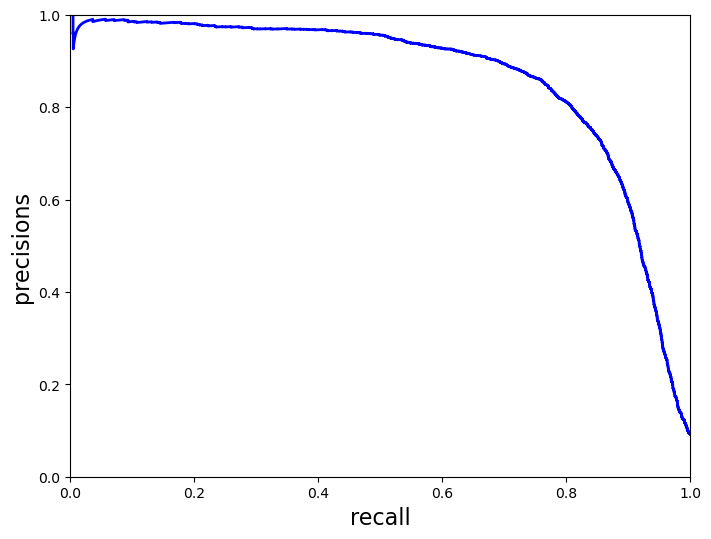

In [33]:
#precision과 recall의 관계
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=2)
    plt.xlabel('recall', fontsize=16)
    plt.ylabel('precisions', fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

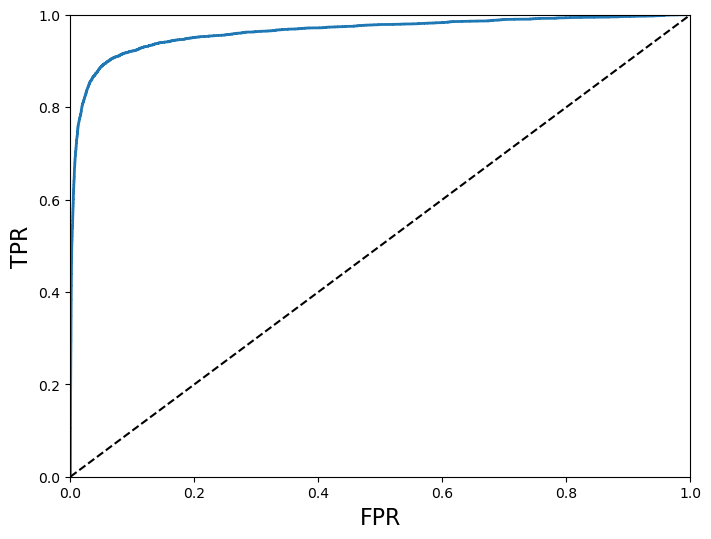

In [37]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16)
    plt.ylabel('TPR', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [34]:
#AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.96352614199268

In [35]:
#RF모형 추가
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [58]:
y_probas_forest # (0일 확률, 1일 확률)

array([[1. , 0. ],
       [0.3, 0.7],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [59]:
#1일 확률
y_scores_forest = y_probas_forest[:, 1]
print(y_scores_forest)

[0.  0.7 0.  ... 0.  0.  0. ]


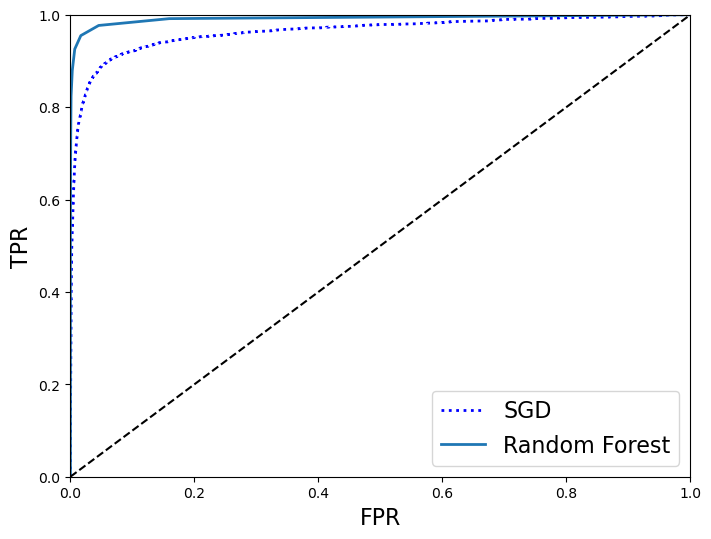

In [60]:
#SGD와 RF 비교
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, 'b:', linewidth=2, label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [40]:
#AUC score
roc_auc_score(y_train_5, y_scores_forest)

0.992068409717976

In [41]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9869584438549955

In [42]:
recall_score(y_train_5, y_train_pred_forest)

0.823648773289061

In [43]:
#다중분류를 위해 모든 데이터 학습
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([4], dtype=int64)

In [61]:
#판별함수 확인
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-827990.30294058, -347430.01152707, -733232.60328154,
        -161714.35663379,  -28418.7233217 , -332282.9442876 ,
        -770651.7048342 , -137865.13563862, -265115.33333376,
         -30788.15949774]])

In [45]:
#가장 높은 점수 출력
print(np.argmax(some_digit_scores))

4


In [46]:
#라벨(클래스) 리스트
print(sgd_clf.classes_)

[0 1 2 3 4 5 6 7 8 9]


In [47]:
#분류한 라벨 이름
print(sgd_clf.classes_[5])

5


#### 일대일전략과 일대다전략
- 일대다전략(one versus all, one versus the rest)
    - 각 분류기의 결정점수 중에서 가장 높은 것을 선택하는 전략
    - 0만 찾는 모형, 1만 찾는 모형, 대부분의 알고리즘에서 사용하는 방식
- 일대일전략(one versus one)
    - 0과 1, 0과 2 등으로 각 숫자의 조합마다 여러개의 모형을 만들어서 가장 성능이 좋은 모형을 채택하는 방식
    - svm에서 사용하는 방식

In [48]:
#일대일전략
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=0))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum numb

array([4], dtype=int64)

In [49]:
#일대일전략에서 사용하는 분류기의 개수
len(ovo_clf.estimators_)

45

In [50]:
#평균 정확도
pred = ovo_clf.predict(X_test)
np.mean(pred == y_test)

0.9136

In [52]:
#1대다전략
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SGDClassifier(max_iter=5, random_state=10))
ovr_clf.fit(X_train, y_train)

c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum numb

OneVsRestClassifier(estimator=SGDClassifier(max_iter=5, random_state=10))

In [53]:
#분류기 개수
len(ovr_clf.estimators_) 

10

In [54]:
#평균 정확도
pred = ovr_clf.predict(X_test)
np.mean(pred == y_test)

0.8594

In [55]:
#다중 레이블 분류
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7) # 7, 8, 9
y_train_odd = (y_train % 2 == 1) # 홀수
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [56]:
knn_clf.predict([some_digit])

c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[ True,  True]])